In [1]:
%matplotlib inline
%precision 2
# -*- coding:gbk -*-
#https://www.kaggle.com/helgejo/titanic/an-interactive-data-science-tutorial
#http://blog.csdn.net/han_xiaoyang/article/details/49797143

'%.2f'

# https://www.kaggle.com/helgejo/titanic/an-interactive-data-science-tutorial

In [20]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [7]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
full = train.append(test)
titanic = full[ :891 ]

#del train , test

print ('Datasets:' , 'full:' , full.shape , 'titanic:' , titanic.shape)

Datasets: full: (1309, 12) titanic: (891, 12)


In [4]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


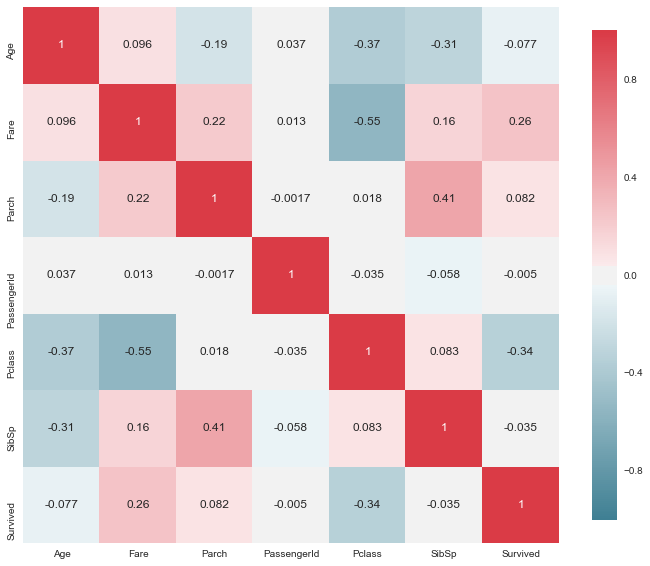

In [10]:
plot_correlation_map( titanic )

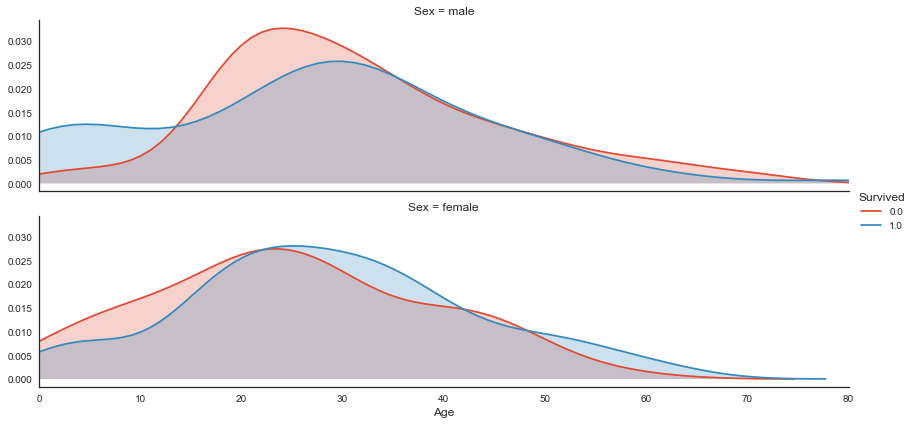

In [11]:
# Plot distributions of Age of passangers who survived or did not survive
plot_distribution( titanic , var = 'Age' , target = 'Survived' , row = 'Sex' )

# http://blog.csdn.net/han_xiaoyang/article/details/49797143

In [1]:
%matplotlib notebook

In [66]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

data_train = pd.read_csv("Train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [68]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
def rotate_xtlabel(ax,degree):
    """
    ax: axe
    degree:旋转度数
    """
    for x in ax.get_xticklabels():
        x.set_rotation(degree) 

## Pandas.DataFrame.plot() 
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

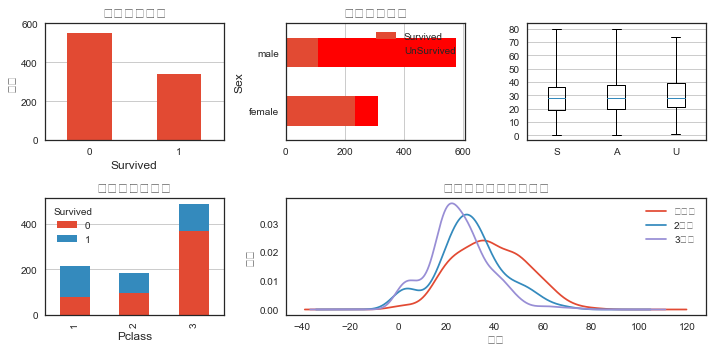

In [31]:
#
plt.figure(figsize=(10,5))
#生还人数对比
ax1=plt.subplot(2,3,1)
data_train.Survived.value_counts().plot(kind='bar')
ax1.set_xlabel(u"Survived")
ax1.set_ylabel(u"人数")
ax1.set_title(u"生还人数对比")
rotate_xtlabel(ax1,0)
ax1.grid(axis='y')
ax1.set_ylim(0,600)
#男女人数/生还人数对比
sex={'female':1,'male':0}#['female','male']
sex_survived=data_train[data_train.Survived==1].Sex.value_counts().sort_index()
sex_unsurvived=data_train[data_train.Survived==0].Sex.value_counts().sort_index()
ax2=plt.subplot(2,3,2)
ax2.set_ylabel(u"Sex")
ax2.set_title(u"男女人数对比")
sex_survived.plot(kind='barh')
sex_unsurvived.plot(kind='barh',left=sex_survived,color='r')
ax2.grid(axis='x')
ax2.legend(['Survived','UnSurvived'])
#按年龄分布
ax3=plt.subplot(2,3,3)
age_survived=data_train[data_train.Survived==1].Age.dropna()
age_unsurvived=data_train[data_train.Survived==0].Age.dropna()
age_all=data_train.Age.dropna()
#age_unsurvived.plot(kind='box')
#age_survived.plot(kind='box')
plt.boxplot([age_survived,age_all,age_unsurvived],whis='range')
ax3.set_xticklabels(['S','A','U'])
#设置Y轴刻度并显示网格线
ax3.set_yticks(np.arange(0,90,10))
ax3.grid(axis='y')
ax4=plt.subplot(2,3,4)
#pclass_1=data_train[data_train.Pclass==1].Pclass.value_counts()
#pclass_2=data_train[data_train.Pclass==2].Pclass.value_counts()
#pclass_3=data_train[data_train.Pclass==3].Pclass.value_counts()
#plt.hist(age_survived,bins=50)
data_train.groupby(by=['Pclass','Survived']).count().PassengerId.unstack().plot(kind='bar',ax=ax4,stacked=True)
ax4.set_title("各舱位生还人数")
ax4.grid(axis='y')

ax5=plt.subplot(2,3,(5,6))
#plt.hist(age_unsurvived,bins=50)
#plt.hist2d(age_survived,age_survived,bins=100)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱',u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.


#自动重新摆放图片，防止重叠
plt.tight_layout()

In [32]:
#不同舱位中男女获救比例
#有无Cabin 获救比例
#Cabin缺失数据过多
#通过在Excel中观察数据，Ticket和Fare之间有比较强的关联

matplotlib.container.BarContainer

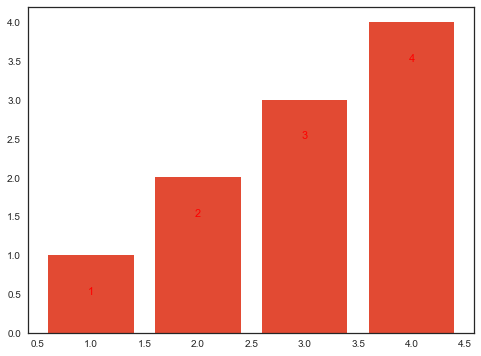

In [33]:
plt.figure()
x=np.array([1,2,3,4])
bars=plt.bar(x,x)

for bar in bars:
    plt.gca().text(bar.get_x()+bar.get_width()/2,bar.get_height()-0.5,str(int(bar.get_height())),ha='center',color='r',fontsize=11)
#plt.show()
type(bars)

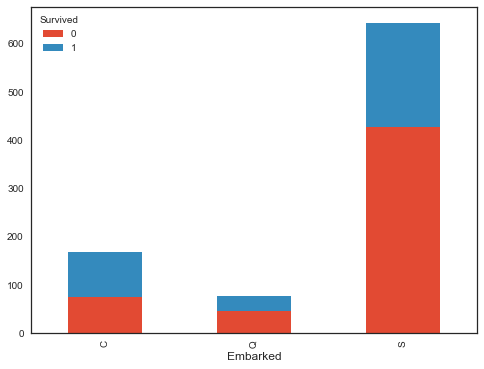

In [34]:
#登船口岸生还情况
plt.figure()
ax6=plt.subplot(111)
data_train.groupby(by=['Embarked','Survived']).count().PassengerId.unstack().plot(kind='bar',ax=ax6,stacked=True)

# import the artist class from matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

#for bar in ax6.gca().get_children():
 #   plt.gca().text(bar.get_x()+bar.get_width()/2,bar.get_heigth()-5,str(int(bar.get_height())),ha='center',color='w',fontsize=11)

In [36]:
from sklearn import neighbors  
from sklearn.metrics import precision_recall_curve  
from sklearn.metrics import classification_report  
from sklearn.cross_validation import train_test_split
from sklearn import model_selection as ms
from sklearn import cross_validation

In [37]:
#kNN
#通过登船地点区分，只有2个没有登船地点信息
knn_train=data_train.copy()
knn_train.loc[:,'Sex'][knn_train.Sex=="male"]=0
knn_train.loc[:,'Sex'][knn_train.Sex=="female"]=1
knn_train.loc[:,'Embarked'][knn_train.Embarked=="C"]=0
knn_train.loc[:,'Embarked'][knn_train.Embarked=="Q"]=1
knn_train.loc[:,'Embarked'][knn_train.Embarked=="S"]=2
knn_train.loc[:,'Embarked'].fillna(3,inplace=True)

In [38]:
knn_train.loc[:,'Embarked'].unique()

array([2, 0, 1, 3], dtype=int64)

In [39]:
knn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


In [40]:
#通过票区分
knn_train.loc[:,'Ticket'].unique().size

681

In [48]:
#通过登船地点区分，只有2个没有登船地点信息
name=list(knn_train.loc[:,'Name'].unique())
name.sort()
name

['Abbing, Mr. Anthony',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Alexander, Mr. William',
 'Alhomaki, Mr. Ilmari Rudolf',
 'Ali, Mr. Ahmed',
 'Ali, Mr. William',
 'Allen, Miss. Elisabeth Walton',
 'Allen, Mr. William Henry',
 'Allison, Master. Hudson Trevor',
 'Allison, Miss. Helen Loraine',
 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
 'Allum, Mr. Owen George',
 'Andersen-Jensen, Miss. Carla Christine Nielsine',
 'Anderson, Mr. Harry',
 'Andersson, Master. Sigvard Harald Elias',
 'Andersson, Miss. Ebba Iris Alfrida',
 'Andersson, Miss. Ellis Anna Maria',
 'Andersson, Miss. Erna Alexandra',
 'Andersson, Miss. Ingeborg Constanzia',
 'Andersson, Miss. Sigrid Elisabeth',
 'Andersson, Mr. Anders Johan',
 'Andersson, Mr. Au

In [49]:
result=knn_train.loc[:,'Survived']
result.head()
#knn_train.drop(labels=['PassengerId','Survived','Name','Ticket','Age','Cabin','Embarked'],axis=1,inplace=True)
knn_train.drop(labels=['Survived','Name','Ticket','Cabin','Age'],axis=1,inplace=True)

In [69]:
knn_train.drop(labels=['Embarked'],axis=1,inplace=True)

ValueError: labels ['Embarked'] not contained in axis

1.0


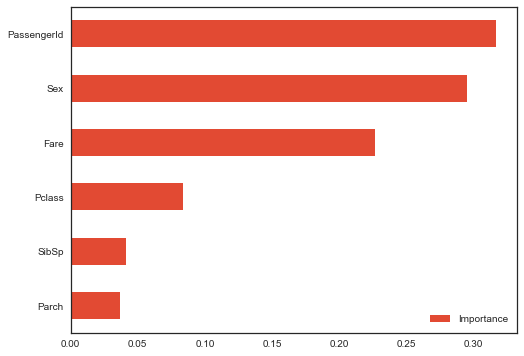

In [70]:
plot_variable_importance(knn_train,result)

In [71]:
plot_model_var_imp(clf,knn_train,result)

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [51]:
#定义权重函数
def cu_weight(distance):
    """distance :np.ndarray"""
    print(distance)
    #['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']
    w=np.array([0.7,0.9,1.0,1.0,1.0])
    return distance*w

In [52]:
a=np.random.randn(3,5)
a

array([[ 0.54, -0.23, -0.02,  1.72,  2.  ],
       [-0.33, -0.15, -0.53, -1.31,  1.24],
       [-0.29,  0.59, -0.55,  1.88,  0.37]])

In [53]:
w=np.array([0.8,0.5,1.0,1.0,1.0])
np.multiply(a,w)

array([[ 0.43, -0.11, -0.02,  1.72,  2.  ],
       [-0.26, -0.07, -0.53, -1.31,  1.24],
       [-0.23,  0.3 , -0.55,  1.88,  0.37]])

In [54]:
clf = neighbors.KNeighborsClassifier(algorithm='kd_tree',n_neighbors=5,leaf_size=30,p=2#,weights=cu_weight
                                    )  
clf.fit(knn_train, result)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [57]:
answer = clf.predict(knn_train)
w=0
wlist=pd.DataFrame({'ID':[],'Survived':[]},dtype=int)
for i in range(len(answer)):
    if answer[i]!=result[i]:
        w+=1
        wlist=wlist.append({'ID':i,'Survived':answer[i]},ignore_index=True)
        #wlist=wlist.append({data_train.iloc[i],'wAnswer':answer[i]})
print('Train Set Size:',len(knn_train),'Wrong:',w,'Predict Rate:',(len(knn_train)-w)/len(knn_train))
'''''准确率与召回率'''  
precision, recall, thresholds = precision_recall_curve(result, clf.predict(knn_train))  
#answer = clf.predict_proba(knn_train)[:,1]
print(classification_report(result.values, answer))  
print(cross_validation.cross_val_score(clf,knn_train,result))

Train Set Size: 891 Wrong: 231 Predict Rate: 0.7407407407407407
             precision    recall  f1-score   support

          0       0.75      0.88      0.81       549
          1       0.73      0.52      0.61       342

avg / total       0.74      0.74      0.73       891

[ 0.65  0.41  0.64]


In [62]:
from sklearn.cross_validation import train_test_split , StratifiedKFold, cross_val_score
scores = cross_val_score(clf, knn_train, result, cv=5,n_jobs=3)
scores

array([ 0.62,  0.46,  0.46,  0.52,  0.68])

In [65]:
from sklearn import metrics
#耗时巨长
%time scores = cross_val_score(clf, knn_train, result, cv=5, scoring='f1_macro')
scores

Wall time: 58 ms


array([ 0.41,  0.46,  0.46,  0.52,  0.56])

In [56]:
#预测错误数据列表
wdata=data_train.loc[wlist['ID']].copy()
wdata=wdata.assign(wAnswer=wlist['Survived'].values)
wdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,wAnswer
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S,0
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S,1
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.00,1,0,345763,18.0000,NaN,S,1
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S,0


In [371]:
data_test = pd.read_csv("Test.csv")
test=data_test.copy()
data_test.drop(labels=['PassengerId','Name','Ticket','Age','Cabin','Embarked'],axis=1,inplace=True)
data_test.loc[:,'Sex'][data_test.Sex=="male"]=0
data_test.loc[:,'Sex'][data_test.Sex=="female"]=1
#data_test.head()
data_test.info()
data_test.loc[:,'Fare'].fillna(data_test.loc[:,'Fare'].mean(),inplace=True)
#data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass    418 non-null int64
Sex       418 non-null object
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      417 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 14.7+ KB


c:\users\wang\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\wang\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [313]:
knn_train.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [292]:
answer_test = clf.predict(data_test)

In [301]:
test.loc[:,'PassengerId'].values
#answer_test
answer_csv=pd.DataFrame({'PassengerId':test.loc[:,'PassengerId'].values,'Survived':answer_test})

In [308]:
answer_csv.drop(answer_csv.index)

,PassengerId,Survived


In [309]:
answer_csv

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,1
8,900,1
9,901,0
